In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
o3 = pd.read_csv("../features/poj_features_O3.csv", skipinitialspace=True)
o3 = o3.loc[:, o3.columns != 'class']
o3 = o3.set_index('id')

o0 = pd.read_csv("../features/poj_features_O0.csv", skipinitialspace=True)
o0 = o0.loc[:, o0.columns != 'class']
o0 = o0.set_index('id')

ollvm = pd.read_csv("../features/poj_features_ollvm.csv", skipinitialspace=True)
ollvm = ollvm.loc[:, ollvm.columns != 'class']
ollvm = ollvm.set_index('id')

In [21]:
def norm(df):
    cout = 0
    for column in df.columns:
        if not (df[column].max() == 0 and df[column].min() == 0):
            dif = df[column].max() - df[column].min()
            df[column] = (df[column] - df[column].min())/dif
        print("Column {} calculated".format(cout), end='\r')
        cout += 1
    return df

In [22]:
o3 = o3.T
o3 = norm(o3)
o3 = o3.T

In [26]:
o0 = o0.T
o0 = norm(o0)
o0 = o0.T

In [27]:
ollvm = ollvm.T
ollvm = norm(ollvm)
ollvm = ollvm.T

In [53]:
o3Distances = np.zeros(o0.shape[0])
ollvmDistances = np.zeros(o0.shape[0])

i = 0
for _, row in o0.iterrows():
    id = row.name
    original = row.to_numpy()

    if id in o3.index:
        temp = o3.loc[id]
        otimized = temp.to_numpy()
        dist = np.linalg.norm(original - otimized)
        o3Distances[i] = dist

    if id in ollvm.index:
        temp = ollvm.loc[id]
        obfuscated = temp.to_numpy()
        dist = np.linalg.norm(original - obfuscated)
        ollvmDistances[i] = dist

    print("The index {} was successfully calculated".format(i), end='\r')
    i += 1

In [54]:
print("Sum of distances between the O3 programs to original programs: {}".format(sum(o3Distances)))
print("Sum of distances between the OLLVM programs to original programs: {}".format(sum(ollvmDistances)))

Sum of distances between the O3 programs to original programs: 69862.17780340453
Sum of distances between the OLLVM programs to original programs: 70250.14997856955


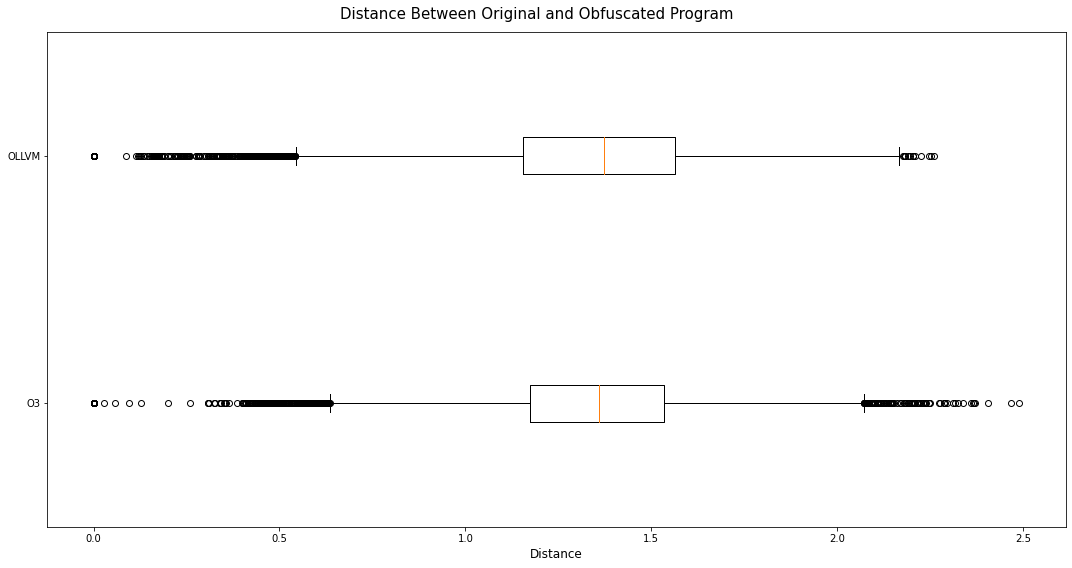

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

fig.suptitle('Distance Between Original and Obfuscated Program', fontsize=15)
ax.boxplot(
    [o3Distances, ollvmDistances], 
    vert=False, 
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)

# plt.savefig('distance.pdf')
fig.tight_layout()

Number of outliers of OLLVM: 511
Number of outliers of O3: 690


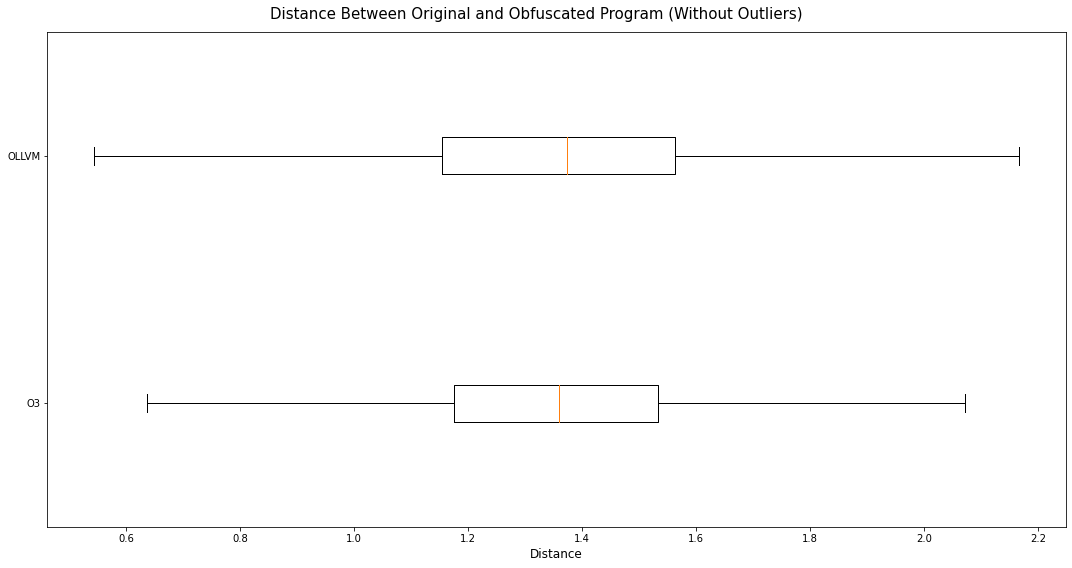

In [56]:
df_O3Distances = pd.Series(o3Distances)
df_ollvmDistances = pd.Series(ollvmDistances)

def countOutliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

out = countOutliers(df_ollvmDistances)
print("Number of outliers of OLLVM: {}".format(out.sum()))
out2 = countOutliers(df_O3Distances)
print("Number of outliers of O3: {}".format(out2.sum()))

fig, ax = plt.subplots(1, 1, figsize=(15,8))

fig.suptitle('Distance Between Original and Obfuscated Program (Without Outliers)', fontsize=15)
ax.boxplot(
    [df_O3Distances, df_ollvmDistances], 
    vert=False, 
    whis=1.5,
    showfliers=False,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)
fig.tight_layout()